In [80]:
import os 
import pandas as pd 
import numpy as np 
from wordcloud import WordCloud
import json

In [81]:
#csv file
csv_file="/proj/digbose92/ads_repo/ads_codes/SAIM-ADS/data/SAIM_data/SAIM_multi_task_tone_soc_message_topic_data_no_zero_files.csv"
csv_data=pd.read_csv(csv_file)
soc_msg_csv_data=csv_data[csv_data['social_message']=='Yes']
print(soc_msg_csv_data.shape)
clip_feature_key_list=[os.path.splitext(f.split("/")[-1])[0] for f in list(soc_msg_csv_data['clip_feature_path'])]

(759, 11)


In [82]:
#transcripts file
en_transcripts_file="/proj/digbose92/ads_repo/transcripts/en_combined_transcripts.json"
with open(en_transcripts_file,"r") as f:
    en_data=json.load(f)

In [83]:
intersect_keys=list(set(en_data.keys()) & set(clip_feature_key_list))
print(len(intersect_keys))

742


In [84]:
from collections import Counter
list_of_list_soc_msg=[]
for key in intersect_keys:
    list_of_list_soc_msg.append((en_data[key]))

In [85]:
word_flat_list=[]
for word_list in list_of_list_soc_msg:
    word_flat_list=word_flat_list+word_list.split(" ")

In [86]:
dict_counter=Counter(word_flat_list)
print(dict_counter)

Counter({'the': 2717, 'to': 2191, 'I': 1911, 'a': 1819, 'and': 1437, 'you': 1360, 'of': 1302, 'in': 897, 'is': 858, 'that': 777, 'for': 634, '': 584, 'we': 557, 'my': 526, 'it': 521, 'are': 496, 'have': 492, 'your': 469, 'be': 463, "I'm": 430, 'on': 413, 'with': 407, 'And': 404, 'was': 403, 'this': 389, 'not': 369, 'You': 361, '♪♪': 356, 'The': 339, 'can': 331, 'me': 327, 'just': 319, 'do': 286, 'all': 285, "don't": 282, 'they': 270, 'at': 265, 'like': 264, 'will': 252, 'We': 246, "It's": 244, 'get': 243, 'our': 243, 'about': 238, 'one': 230, 'know': 225, 'what': 218, "it's": 212, 'from': 212, 'you.': 202, 'but': 198, 'It': 196, 'so': 194, 'by': 190, 'no': 190, 'more': 187, 'an': 185, 'people': 183, 'if': 183, 'as': 179, 'when': 178, 'want': 176, 'think': 175, 'But': 173, 'or': 172, 'up': 170, 'see': 168, 'how': 168, 'going': 167, 'their': 164, 'out': 162, '♪': 158, 'who': 157, 'So': 156, 'he': 155, 'make': 153, 'it.': 153, 'would': 149, 'has': 144, "can't": 144, 'go': 143, 'This': 141

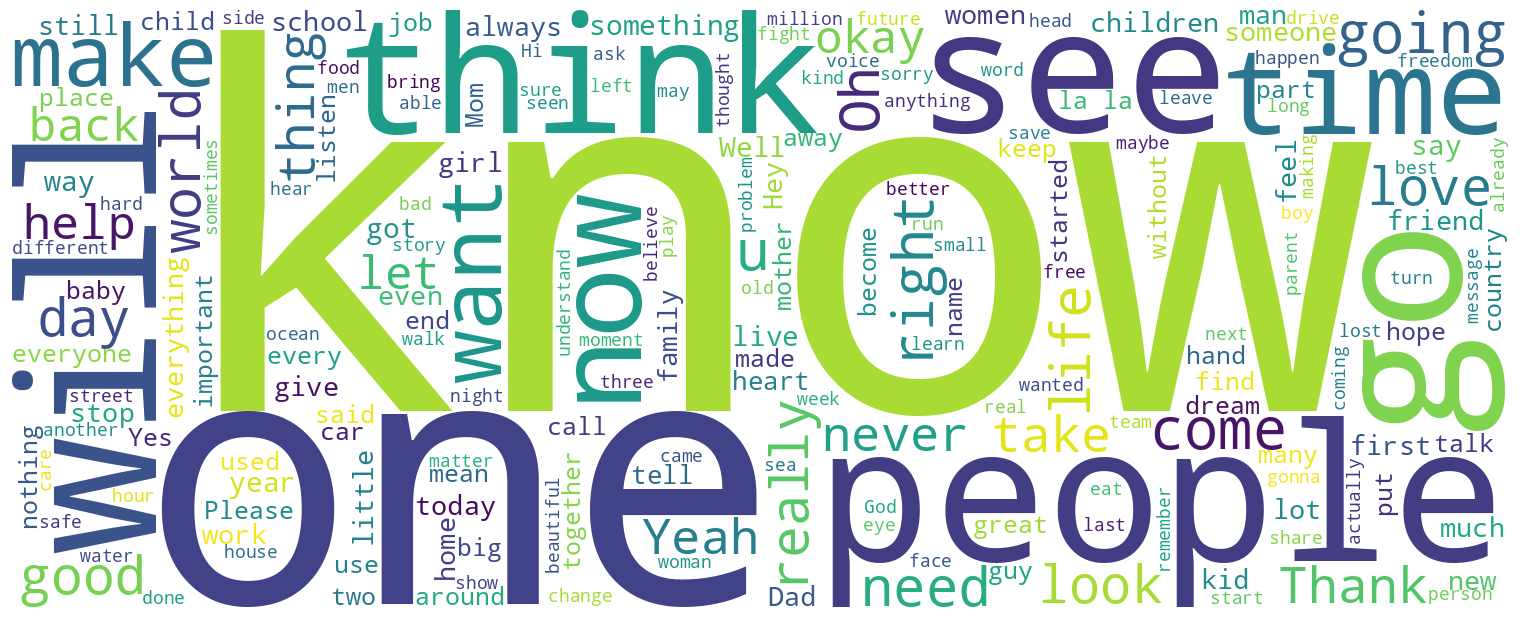

In [158]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,8)
wordcloud = WordCloud(width = 1500, height = 600, 
                background_color ='white', 
                min_font_size = 10).generate(" ".join(word_flat_list))

# plt.figure(, facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [88]:
from transformers import pipeline

classifier = pipeline("ner")
classifier("Hello I'm Omar and I live in Zürich.")

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'entity': 'I-PER',
  'score': 0.99770516,
  'index': 5,
  'word': 'Omar',
  'start': 10,
  'end': 14},
 {'entity': 'I-LOC',
  'score': 0.9968976,
  'index': 10,
  'word': 'Zürich',
  'start': 29,
  'end': 35}]

In [89]:
classifier = pipeline("token-classification", model = "vblagoje/bert-english-uncased-finetuned-pos")
key_list=list(dict_counter.keys())
print(len(key_list))

12981


In [90]:
noun_set=[]
noun_set_unique=[]
noun_set_dict=dict()

from tqdm import tqdm
for key in tqdm(key_list):
    pos_tag=classifier(key)
    if(len(pos_tag)>0):
        if(pos_tag[0]['entity']=='NOUN'):
            dict_unique_key=key.strip().split(".")[0].lower().split(",")[0]
            noun_set.append(key)
            if(dict_unique_key not in noun_set_dict):
                noun_set_dict[dict_unique_key]=[key]
            else:
                lst_tmp=noun_set_dict[dict_unique_key]
                lst_tmp.append(key)
                noun_set_dict[dict_unique_key]=lst_tmp

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 12981/12981 [04:29<00:00, 48.14it/s]


In [91]:
len(noun_set)

5597

In [97]:
#aggregate the number of every sub word 
dict_unique_noun_count=dict()
for key in list(noun_set_dict.keys()):
    
    count=0
    
    for sub_key in noun_set_dict[key]:
        count=count+dict_counter[sub_key]
        
    dict_unique_noun_count[key]=count

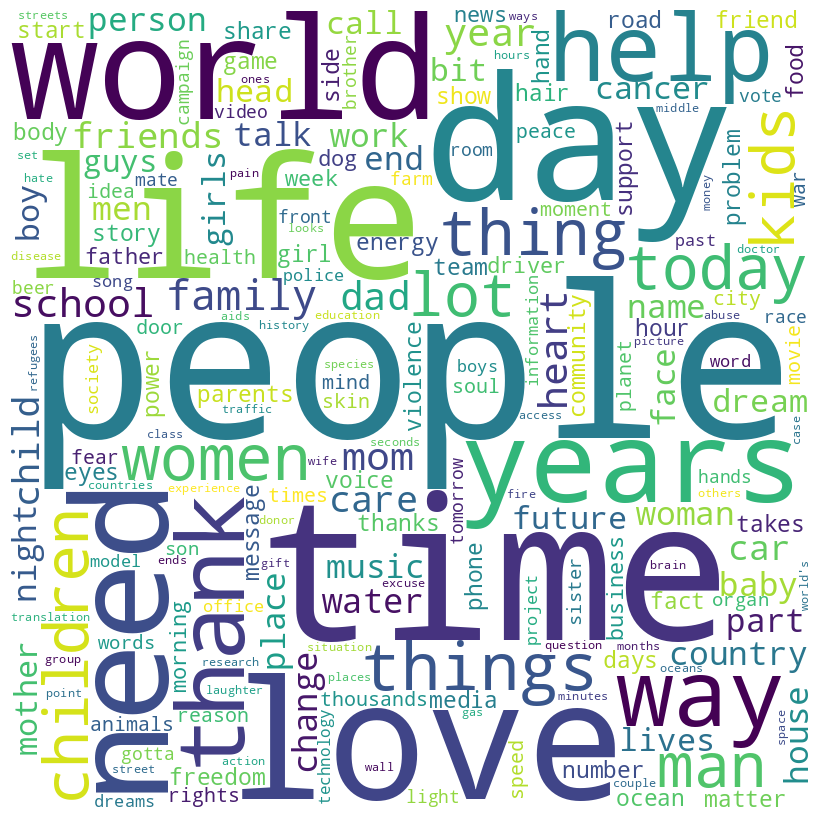

In [98]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate_from_frequencies(dict_unique_noun_count)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

In [137]:
#subfiltering the generic words 

generic_words=['people', 'life', 'thank', 'dad', 'time', 'person', 'love', 'day', 'thing', 'years', 'way', 'need', 'world', 'help', 'things', 'man', 'children', 'women', 'kids', 'today', 'heart', 'lot', 'friends','mom', 'care', 'year', 'men', 'lives', 'call', 'girl', 'girls', 'change','name', 'talk','end', 'work','dream', 'night','mother','guys','place', 'woman .', 'car','boy','baby','bit', 'part', 'thanks', 'story','eyes', 'father', 'friend']
dict_filter=dict()
for key in list(dict_unique_noun_count.keys()):
    if(key in generic_words):
        pass
    else:
        dict_filter[key]=dict_unique_noun_count[key]

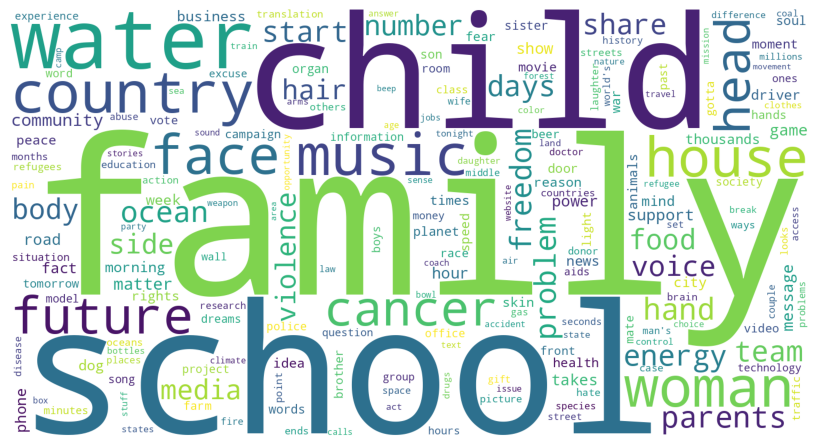

In [161]:
relative_scaling=0.5
wordcloud = WordCloud(width = 1500, height = 800, 
                background_color ='white', 
                min_font_size = 10,max_words=200, relative_scaling=relative_scaling).generate_from_frequencies(dict_filter)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.savefig('../plot_figs/social_message_word_cloud.png',dpi=300)
#plt.show()

In [3]:
import json
country_aow_file="../data/country_AOW_JWT_distribution.json"
with open(country_aow_file, "r") as f:
    country_aow_data=json.load(f)

In [7]:
country_val=0
for k in list(country_aow_data.keys()):
    country_val+=country_aow_data[k]

In [8]:
country_val

7436

In [9]:
len(country_aow_data)

99